# !pip install mlxtend 

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
movies = pd.read_csv('my_movies.csv')
movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [4]:
movies.drop(['V4','V5'],axis = 1,inplace=True)

In [5]:
movies.isna().sum()

V1               0
V2               0
V3               3
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [6]:
movies['V3'].value_counts()

Sixth Sense      4
Harry Potter1    1
Braveheart       1
Gladiator        1
Name: V3, dtype: int64

In [7]:
movies['V3'] = movies['V3'].fillna('Sixth Sense')

In [8]:
movies

,V1,V2,V3,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,Sixth Sense,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,Sixth Sense,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,Sixth Sense,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,1,1,0,0,0,0,0,1,0,1


In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             10 non-null     object
 3   Sixth Sense    10 non-null     int64 
 4   Gladiator      10 non-null     int64 
 5   LOTR1          10 non-null     int64 
 6   Harry Potter1  10 non-null     int64 
 7   Patriot        10 non-null     int64 
 8   LOTR2          10 non-null     int64 
 9   Harry Potter2  10 non-null     int64 
 10  LOTR           10 non-null     int64 
 11  Braveheart     10 non-null     int64 
 12  Green Mile     10 non-null     int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ KB


In [10]:
df=pd.get_dummies(movies)
df.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V1_Sixth Sense,V2_Harry Potter2,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense
0,1,0,1,1,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [11]:
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets

C:\Users\ygred\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
534,0.1,"(V3_Harry Potter1, Sixth Sense, V1_Sixth Sense..."
535,0.1,"(V3_Harry Potter1, Sixth Sense, V1_Sixth Sense..."
536,0.1,"(V3_Harry Potter1, Sixth Sense, V1_Sixth Sense..."
537,0.1,"(V3_Harry Potter1, V1_Sixth Sense, LOTR2, Harr..."


In [20]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,0.400000
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96,-0.333333
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80,-0.200000
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96,-0.333333
...,...,...,...,...,...,...,...,...,...,...
9475,(V1_Sixth Sense),"(Harry Potter1, V2_LOTR1, Green Mile, Sixth Se...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
9476,(Sixth Sense),"(Harry Potter1, V2_LOTR1, Green Mile, V1_Sixth...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000
9477,(LOTR2),"(Harry Potter1, V2_LOTR1, Green Mile, V1_Sixth...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
9478,(V3_Harry Potter1),"(Harry Potter1, V2_LOTR1, Green Mile, V1_Sixth...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000


In [21]:
rules.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4015,"(V1_Sixth Sense, V3_Harry Potter1)","(Green Mile, Sixth Sense, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
3947,"(LOTR1, LOTR2, V2_LOTR1)","(V3_Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
3945,"(LOTR1, Sixth Sense, V2_LOTR1)","(V3_Harry Potter1, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
6551,"(Green Mile, V2_LOTR1, Sixth Sense, Harry Pott...","(V1_Sixth Sense, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
3943,"(Sixth Sense, V2_LOTR1, LOTR2)","(V3_Harry Potter1, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
...,...,...,...,...,...,...,...,...,...,...
37,(Gladiator),(Green Mile),0.7,0.2,0.1,0.142857,0.714286,-0.04,0.933333,-0.571429
1161,(Gladiator),"(Green Mile, V1_Sixth Sense, Sixth Sense)",0.7,0.2,0.1,0.142857,0.714286,-0.04,0.933333,-0.571429
653,(V3_Sixth Sense),"(LOTR2, LOTR1)",0.7,0.2,0.1,0.142857,0.714286,-0.04,0.933333,-0.571429
652,"(LOTR2, LOTR1)",(V3_Sixth Sense),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.600000,-0.333333


In [22]:
rules[rules.lift<0.9]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.960000,-0.333333
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.800000,-0.200000
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.960000,-0.333333
5,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.800000,-0.200000
8,(Sixth Sense),(LOTR2),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.960000,-0.333333
9,(LOTR2),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.800000,-0.200000
36,(Green Mile),(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.600000,-0.333333
37,(Gladiator),(Green Mile),0.7,0.2,0.1,0.142857,0.714286,-0.04,0.933333,-0.571429
40,(V1_Sixth Sense),(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.600000,-0.333333
41,(Gladiator),(V1_Sixth Sense),0.7,0.2,0.1,0.142857,0.714286,-0.04,0.933333,-0.571429


array([[<AxesSubplot:title={'center':'support'}>,
        <AxesSubplot:title={'center':'confidence'}>]], dtype=object)

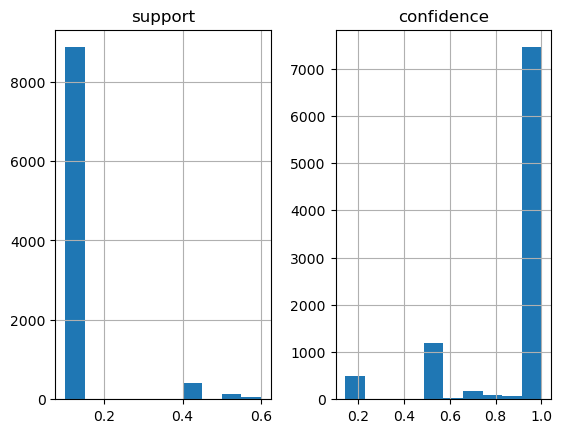

In [24]:
rules[['support','confidence']].hist()

array([[<AxesSubplot:title={'center':'support'}>,
        <AxesSubplot:title={'center':'confidence'}>],
       [<AxesSubplot:title={'center':'lift'}>, <AxesSubplot:>]],
      dtype=object)

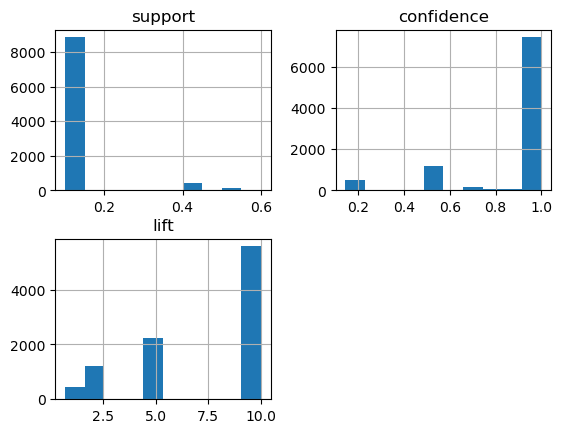

In [25]:
rules[['support','confidence','lift']].hist()

In [27]:
df = pd.read_csv('book.csv')
df

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [28]:
df.isna().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [29]:
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets

C:\Users\ygred\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [30]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
...,...,...,...,...,...,...,...,...,...,...
95,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,0.683298
96,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866
97,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800,0.766114
98,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327,0.726961


In [31]:
rules.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406,1.000000
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf,0.641850
78,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,0.669008
79,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448,0.773887
85,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674,0.730966
...,...,...,...,...,...,...,...,...,...,...
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
12,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105,0.453858
13,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678,0.600225
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870


In [36]:
rules[rules.lift< 2.0]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
...,...,...,...,...,...,...,...,...,...,...
89,"(GeogBks, CookBks)",(DoItYBks),0.1925,0.2820,0.1085,0.563636,1.998711,0.054215,1.645417,0.618796
92,(DoItYBks),"(GeogBks, CookBks)",0.2820,0.1925,0.1085,0.384752,1.998711,0.054215,1.312478,0.695930
93,(CookBks),"(GeogBks, DoItYBks)",0.4310,0.1325,0.1085,0.251740,1.899926,0.051392,1.159357,0.832449
94,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602


array([[<AxesSubplot:title={'center':'support'}>,
        <AxesSubplot:title={'center':'confidence'}>],
       [<AxesSubplot:title={'center':'lift'}>, <AxesSubplot:>]],
      dtype=object)

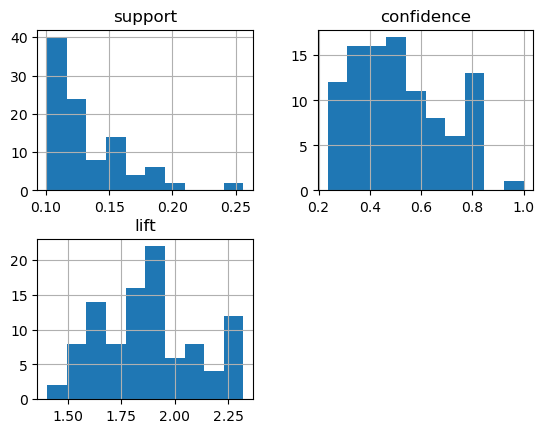

In [37]:
rules[['support','confidence','lift']].hist()

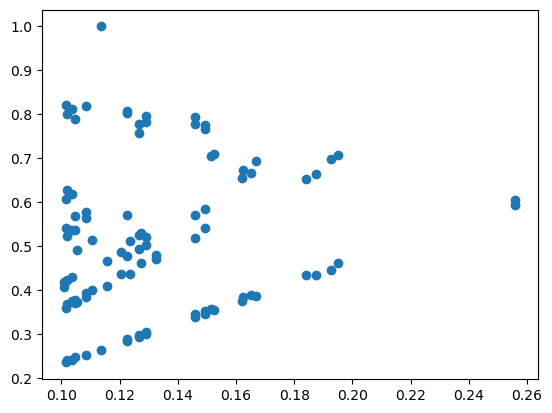

In [38]:
import matplotlib.pyplot as plt

#x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
#y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

plt.scatter(rules['support'], rules['confidence'])
plt.show()